In [43]:
import pandas as pd

In [44]:

df = pd.read_csv('needleman.csv')


In [45]:
df


,Refs,Reads
0,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
1,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
2,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
3,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
4,CATTGGAGACTTCTAGCCGTGTCAGATTTTGGGATGAGCATTTGGT...,CATTGGAGACTTCTAGCCGTGTCAGATTTTGGGATGAGCATTTGGT...
...,...,...
8972,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
8973,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
8974,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
8975,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [46]:
from tqdm import tqdm


In [47]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [48]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [49]:
import difflib


In [50]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [51]:
pairs = []
pairs_no_pos = []


for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 8977/8977 [00:00<00:00, 10280.47it/s]


In [52]:
import numpy as np


In [53]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [54]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> TC 6
CC -> T 7
A -> T 7
C -> G 9
C -> A 9
GG ->  14
CC ->  14
G -> T 27
T -> C 28
G -> A 39
A -> G 45
T ->  112
A ->  117
 -> A 140
C -> T 187
 -> C 201
 -> G 226
C ->  274
 -> T 287
G ->  301


In [55]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [56]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


C ->  @ 101 6
C ->  @ 96 6
G ->  @ 74 6
C -> T @ 1 6
C -> T @ 101 6
 -> T @ 2 7
C ->  @ 1 7
G ->  @ 92 7
C -> T @ 2 13
 -> G @ 110 15
 -> A @ 110 17
 -> A @ 0 17
 -> G @ 0 23
G ->  @ 110 43
 -> C @ 0 47
 -> T @ 0 86


In [57]:
import matplotlib.pyplot as plt

In [58]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[182, 42, 46, 18, 16, 13, 12, 21, 15, 14, 23, 15, 18, 18, 17, 11, 12, 13, 13, 11, 15, 14, 16, 22, 19, 17, 10, 22, 19, 16, 15, 21, 20, 19, 11, 21, 20, 17, 17, 15, 14, 18, 13, 17, 14, 22, 16, 11, 24, 17, 21, 16, 16, 13, 8, 12, 10, 15, 14, 21, 12, 16, 18, 12, 20, 24, 13, 16, 11, 16, 19, 13, 19, 23, 16, 19, 20, 16, 17, 13, 15, 16, 11, 15, 21, 18, 10, 19, 13, 21, 16, 13, 23, 13, 9, 13, 14, 14, 16, 15, 16, 21, 21, 22, 14, 16, 18, 19, 19, 19, 109]


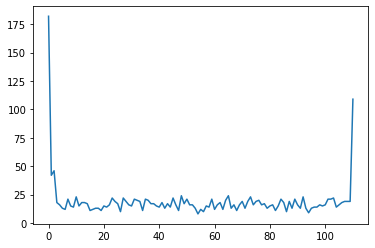

In [59]:
plt.plot(range(strand_len + 1), pos_counts)

In [60]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[86, 5, 7, 2, 4, 2, 1, 3, 5, 1, 4, 2, 2, 3, 0, 1, 1, 1, 5, 0, 2, 2, 2, 2, 5, 0, 1, 2, 2, 2, 2, 1, 4, 4, 2, 1, 4, 1, 5, 1, 1, 4, 2, 2, 1, 4, 2, 3, 2, 3, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 3, 1, 3, 2, 4, 2, 2, 1, 1, 3, 3, 3, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 4, 1, 0, 3, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 5]


In [61]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


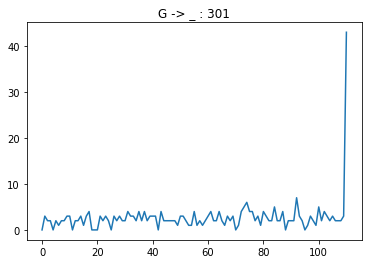

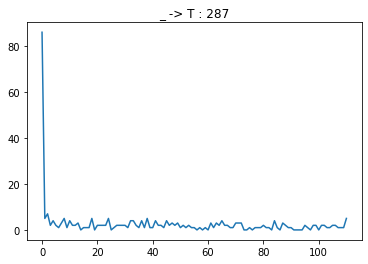

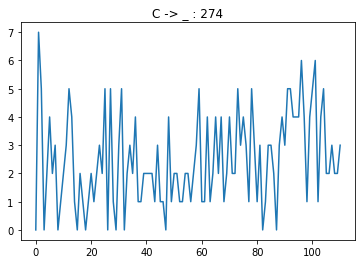

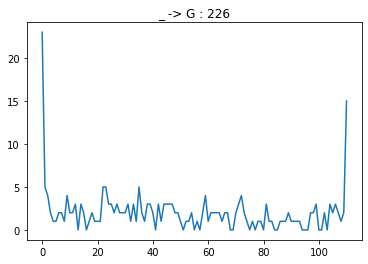

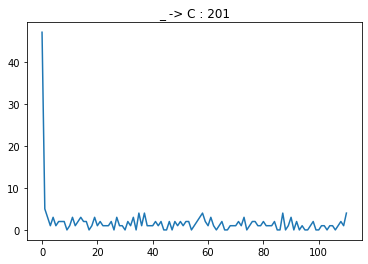

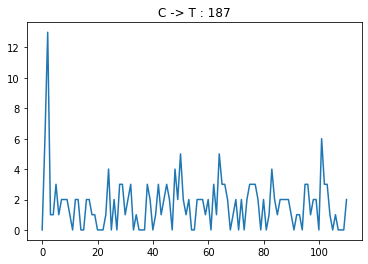

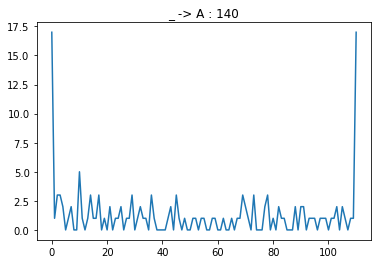

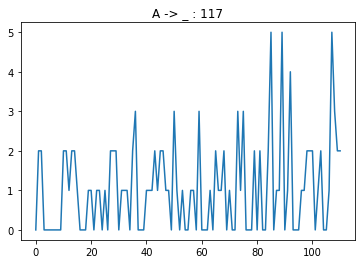

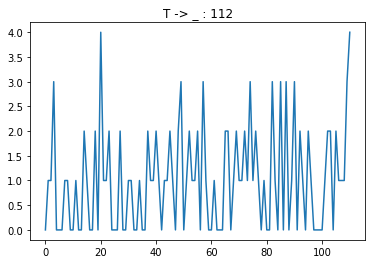

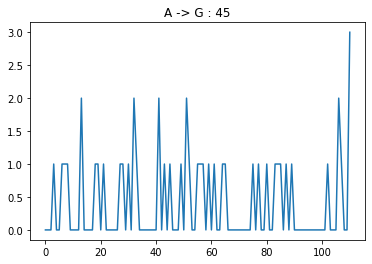

In [62]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [63]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)